## import dependencis

In [157]:
import numpy as np
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler as rus
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## Data Preprocessing

In [158]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [159]:
data.drop('Unnamed: 0' , inplace=True , axis=1)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            358 non-null    object 
 1   State             358 non-null    object 
 2   Area              358 non-null    object 
 3   City              358 non-null    object 
 4   Consumer_profile  358 non-null    object 
 5   Product_category  358 non-null    object 
 6   Product_type      358 non-null    object 
 7   AC_1001_Issue     358 non-null    int64  
 8   AC_1002_Issue     358 non-null    int64  
 9   AC_1003_Issue     358 non-null    int64  
 10  TV_2001_Issue     358 non-null    int64  
 11  TV_2002_Issue     358 non-null    int64  
 12  TV_2003_Issue     358 non-null    int64  
 13  Claim_Value       358 non-null    float64
 14  Service_Centre    358 non-null    int64  
 15  Product_Age       358 non-null    int64  
 16  Purchased_from    358 non-null    object 
 1

In [161]:
data.isna().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [162]:
data.duplicated().sum()

0

In [163]:
data.describe()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,0.332402,0.329609,0.203911,0.377095,0.452514,0.268156,11994.534916,12.812849,201.843575,11.931844,0.097765
std,0.629446,0.615182,0.529559,0.621943,0.670910,0.508353,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,0.000000,0.750000,0.000000,1.000000,1.000000,0.000000,15000.000000,15.000000,303.750000,23.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


In [164]:
encoder = LabelEncoder()
cols = data.select_dtypes(include=['object']).columns

for col in cols:
    encoder.fit(data[col])
    data[col] = encoder.transform(data[col])
    print(col, data[col].unique())

Region [4 1 2 3 5 6 7 0]
State [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14]
Area [1 0]
City [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13]
Consumer_profile [0 1]
Product_category [0 1]
Product_type [1 0]
Purchased_from [2 0 1]
Purpose [1 0 2]


## Handle imbalace data

In [165]:
data['Fraud'].value_counts() ## imbalance data

Fraud
0    323
1     35
Name: count, dtype: int64

In [166]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [167]:
classes_count = y.value_counts()
classes_count[0]/classes_count[1] # Imbalance percentage

9.228571428571428

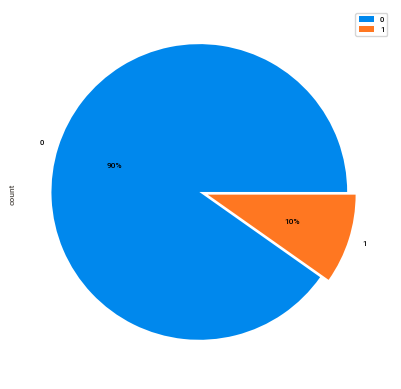

In [168]:
classes_count.plot(kind='pie',autopct='%.0f%%',explode=[0.05,0.01])
plt.legend()

In [169]:
model = rus(sampling_strategy=0.2)
x_balance , y_balance = model.fit_resample(x,y)
x_balance.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose
0,3,16,0,6,1,0,1,0,0,0,0,0,0,10000.0,14,4,0,1.0,1
1,5,0,1,9,0,0,1,0,0,0,1,1,0,4805.0,12,948,0,3.0,0
2,4,11,0,11,0,1,0,0,0,0,0,0,0,15000.0,10,19,2,2.4,2
3,7,5,1,1,1,0,1,0,0,0,0,1,1,4000.0,15,609,1,5.0,0
4,1,0,0,9,1,1,0,0,0,2,0,0,0,10000.0,15,12,0,6.5,0


In [170]:
balance_classes = y_balance.value_counts()
balance_classes[0]/balance_classes[1] # balanc classes

5.0

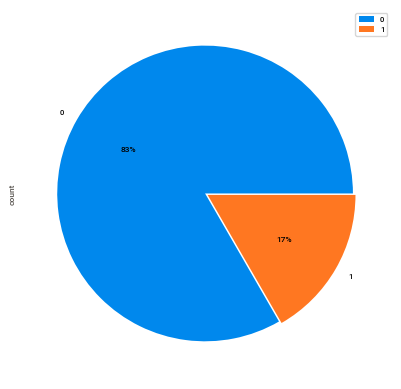

In [171]:
balance_classes.plot(kind='pie',autopct='%.0f%%',explode=[0.01,0.01])
plt.legend()

In [172]:
data = pd.DataFrame(x_balance.join(y_balance))

data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,3,16,0,6,1,0,1,0,0,0,0,0,0,10000.0,14,4,0,1.0,1,0
1,5,0,1,9,0,0,1,0,0,0,1,1,0,4805.0,12,948,0,3.0,0,0
2,4,11,0,11,0,1,0,0,0,0,0,0,0,15000.0,10,19,2,2.4,2,0
3,7,5,1,1,1,0,1,0,0,0,0,1,1,4000.0,15,609,1,5.0,0,0
4,1,0,0,9,1,1,0,0,0,2,0,0,0,10000.0,15,12,0,6.5,0,0


In [173]:
data['Fraud'].value_counts()

Fraud
0    175
1     35
Name: count, dtype: int64

In [174]:
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,3,16,0,6,1,0,1,0,0,0,0,0,0,10000.0,14,4,0,1.0,1,0
1,5,0,1,9,0,0,1,0,0,0,1,1,0,4805.0,12,948,0,3.0,0,0
2,4,11,0,11,0,1,0,0,0,0,0,0,0,15000.0,10,19,2,2.4,2,0
3,7,5,1,1,1,0,1,0,0,0,0,1,1,4000.0,15,609,1,5.0,0,0
4,1,0,0,9,1,1,0,0,0,2,0,0,0,10000.0,15,12,0,6.5,0,0


In [175]:
rfc = RandomForestClassifier(criterion='gini')

In [176]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [177]:
rfc.fit(x,y)

print(rfc.score(x,y))

0.9761904761904762


In [178]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index=x.columns, columns=['Features Importance'])

In [179]:
mean = feature_importance['Features Importance'].mean()
importance_cols = feature_importance[feature_importance['Features Importance'] > mean].T.columns

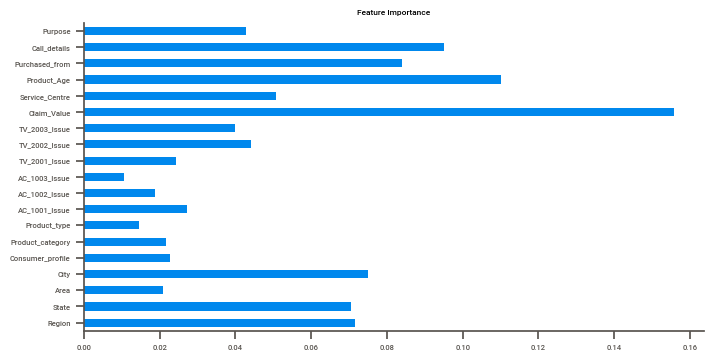

In [180]:
feature_importance['Features Importance'].plot(kind='barh', figsize=(8, 4), title='Feature Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

## EDA(Exploratory Data Analysis)

In [181]:
plot_features = list(importance_cols)
print(plot_features)

['Region', 'State', 'City', 'Claim_Value', 'Product_Age', 'Purchased_from', 'Call_details']


                                             |          | [  0%]   00:00 -> (? left)


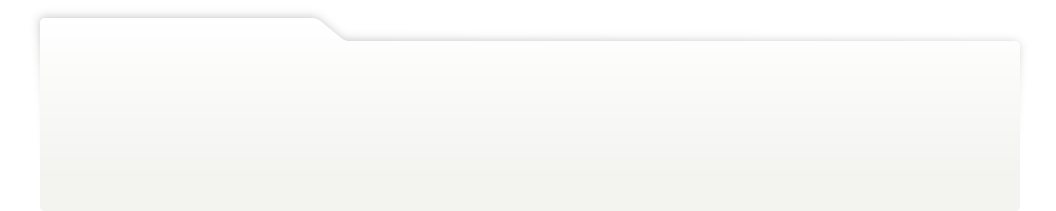
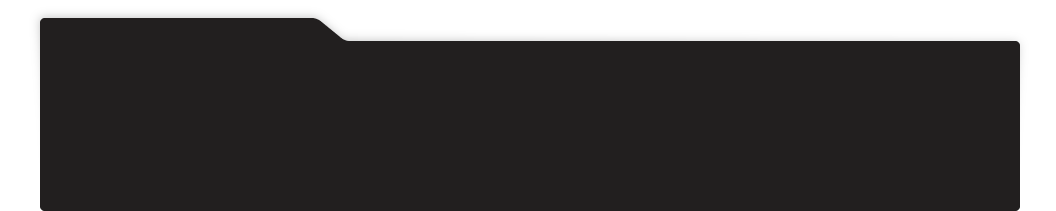
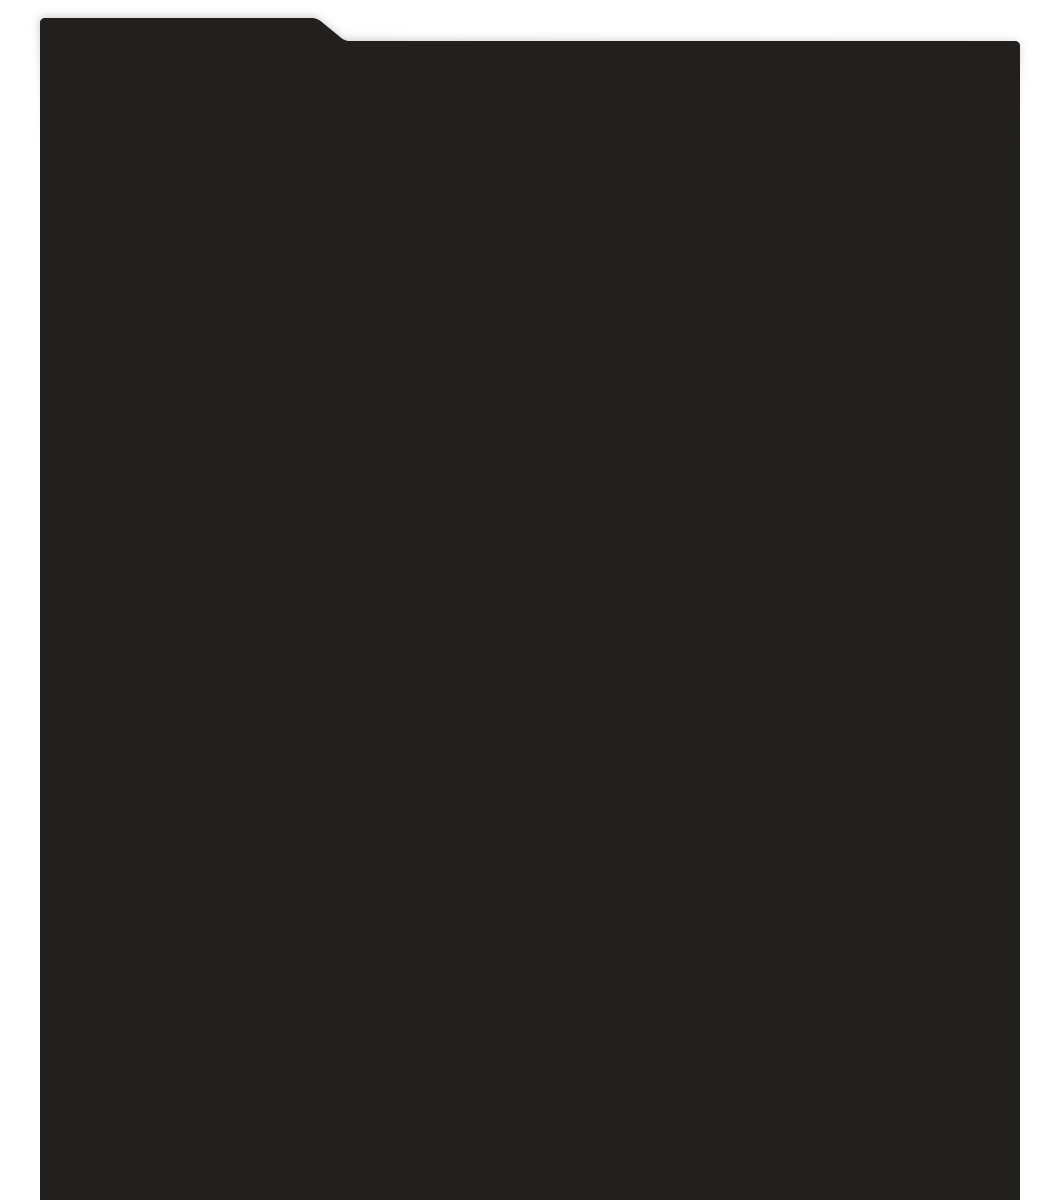
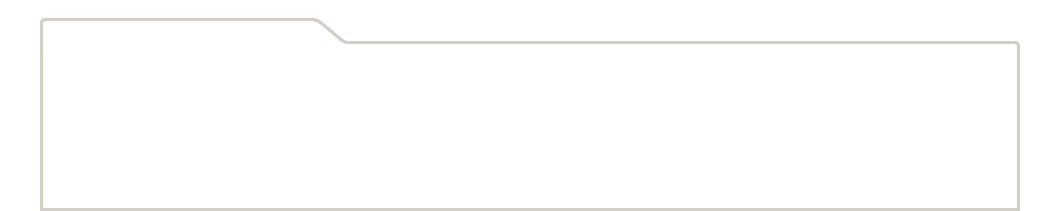
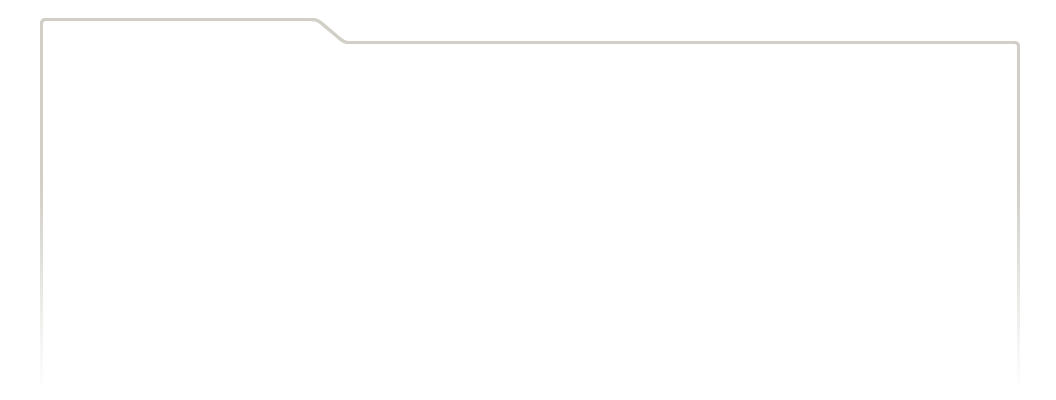
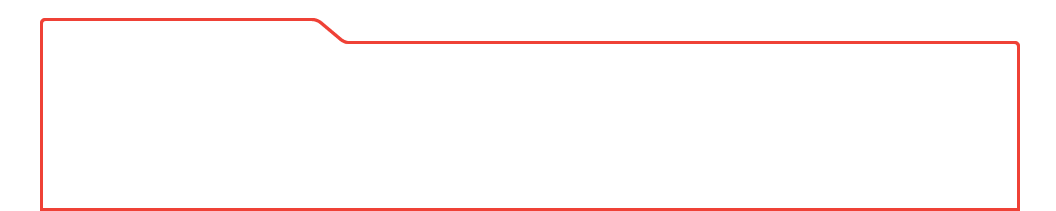
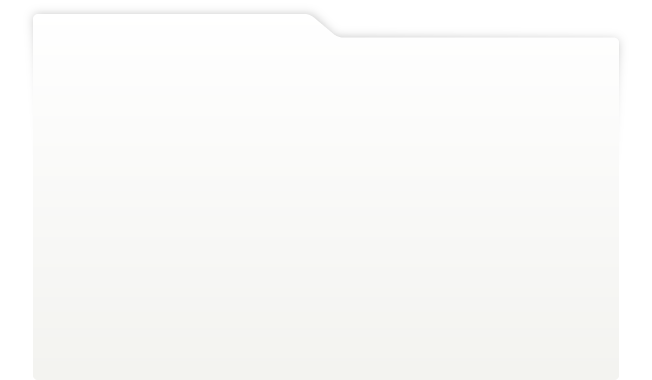
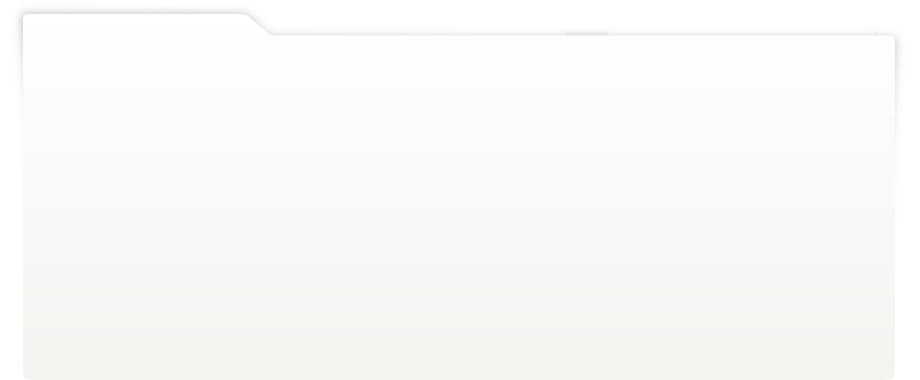
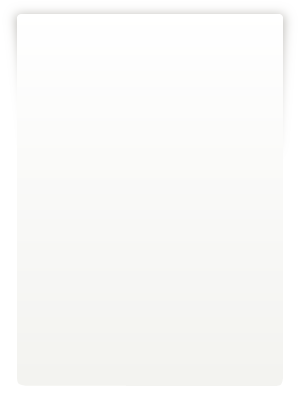
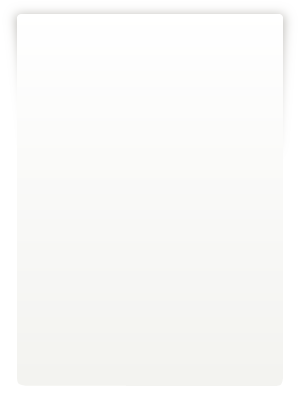
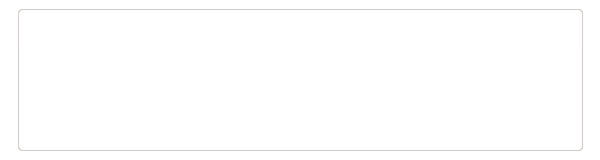
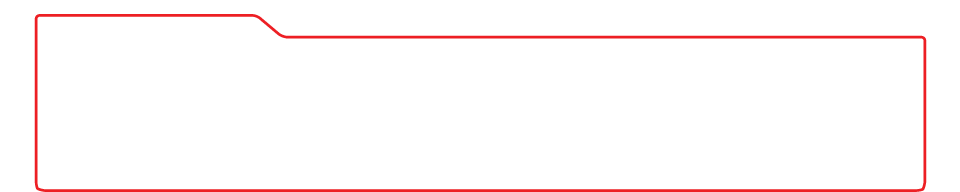
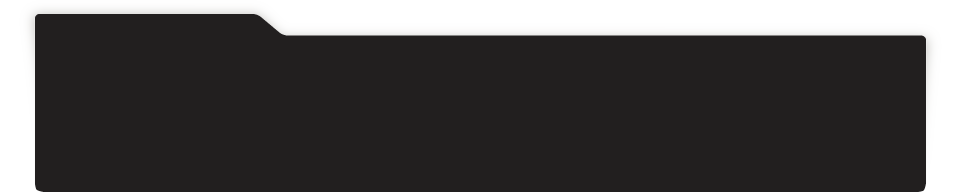
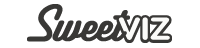
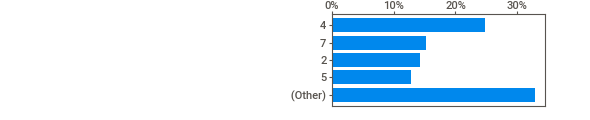
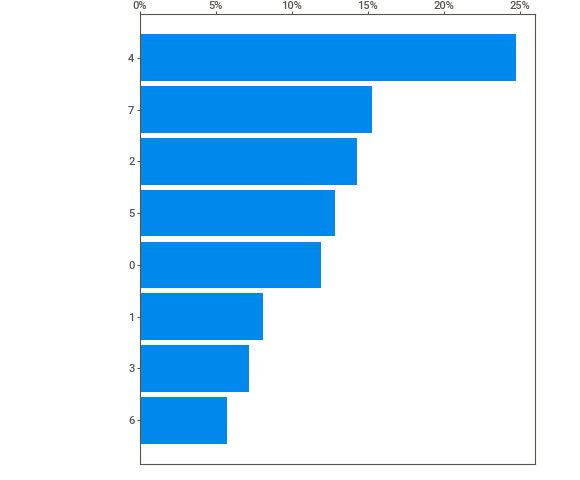
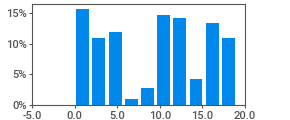
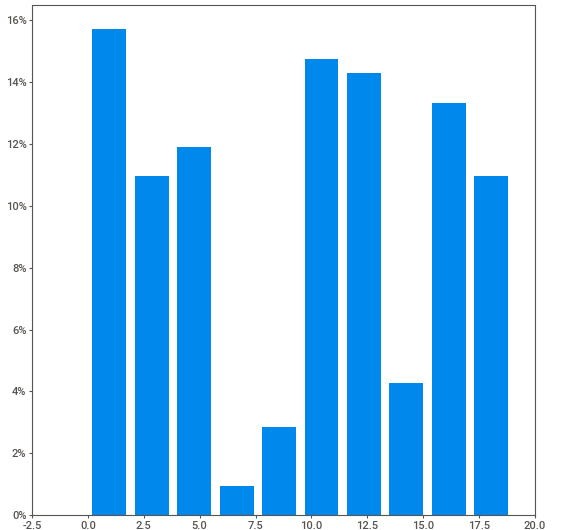
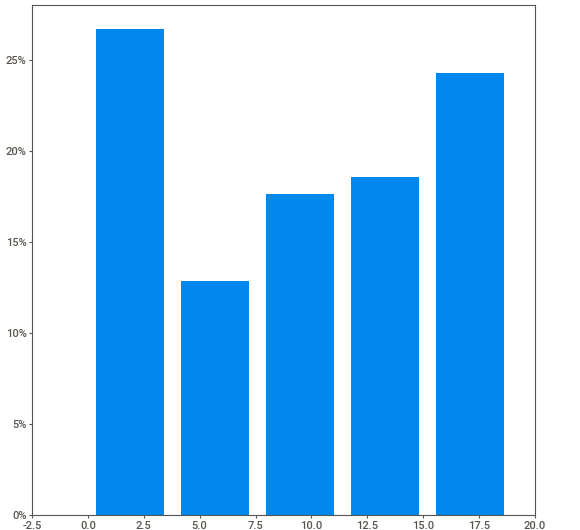
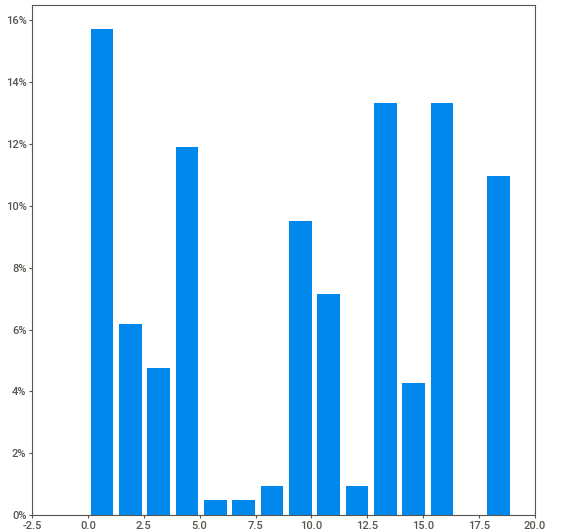
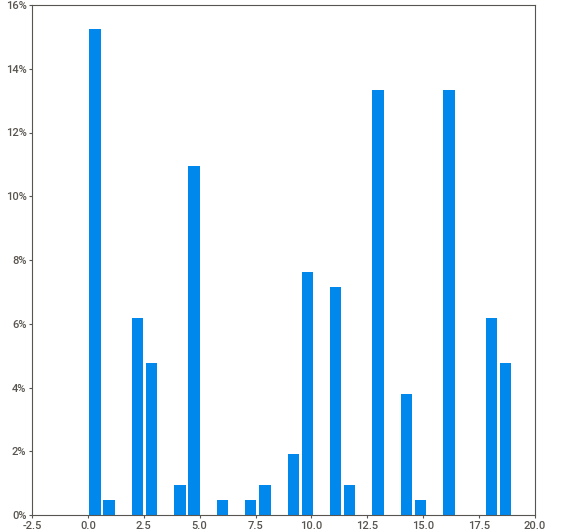
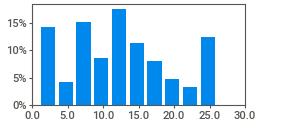
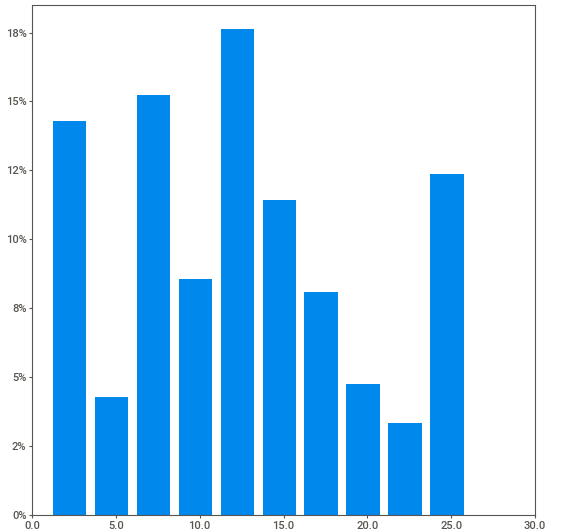
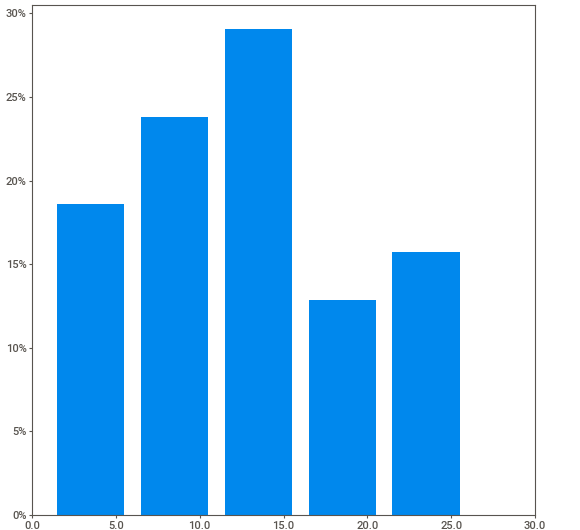
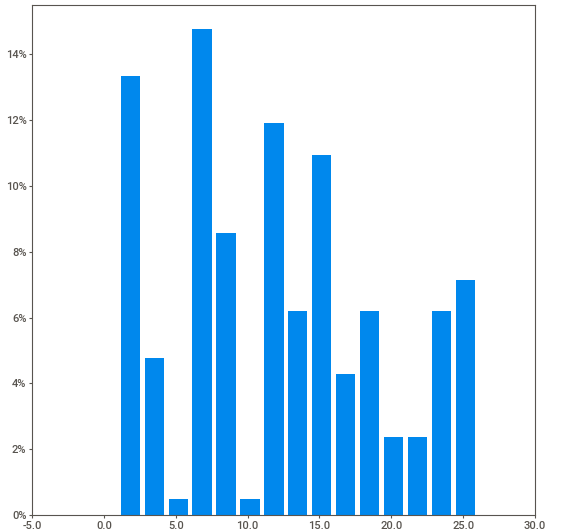
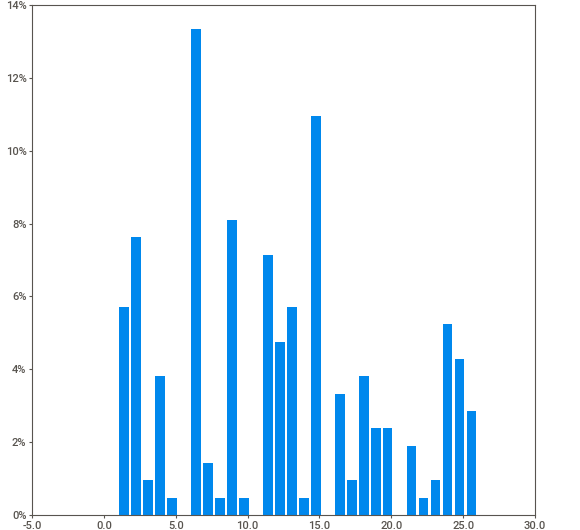
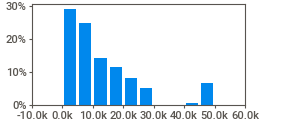
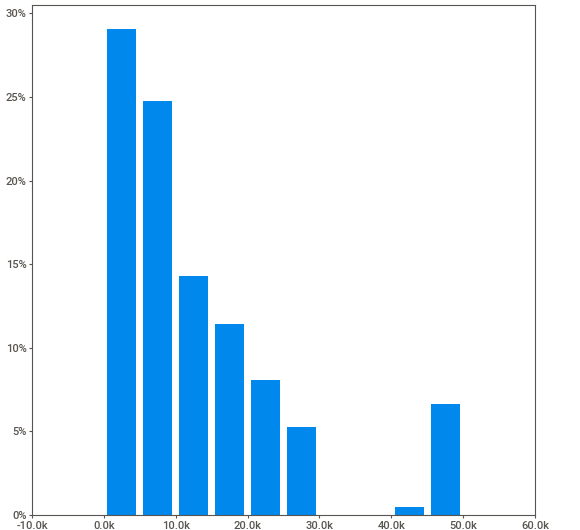
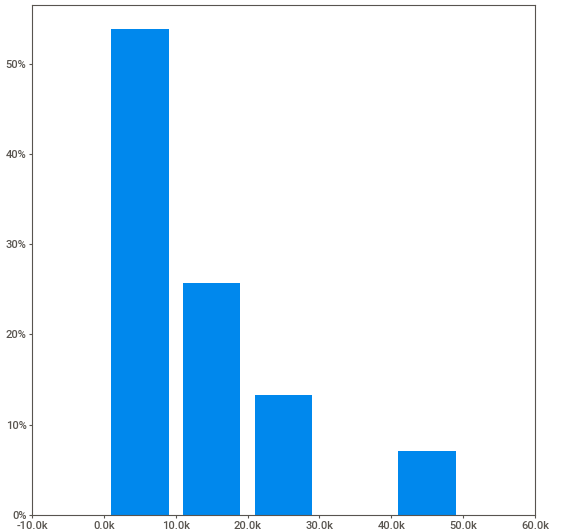
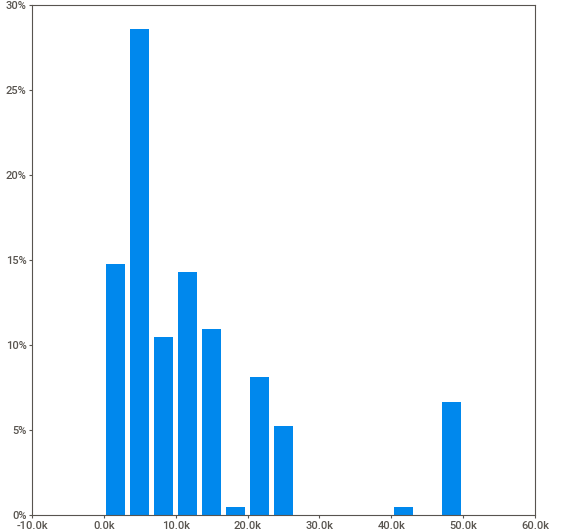
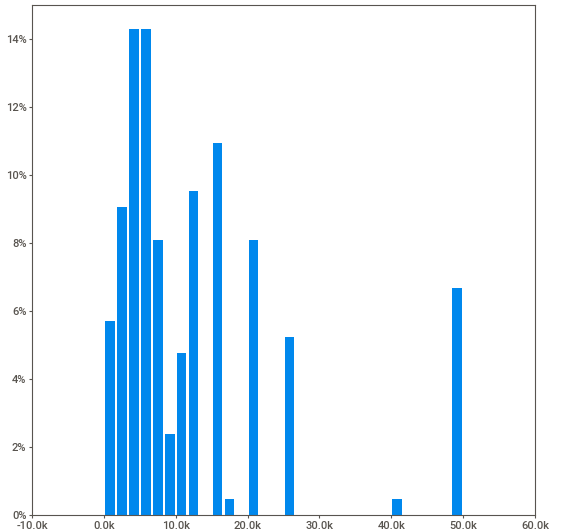
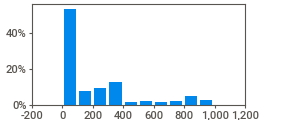
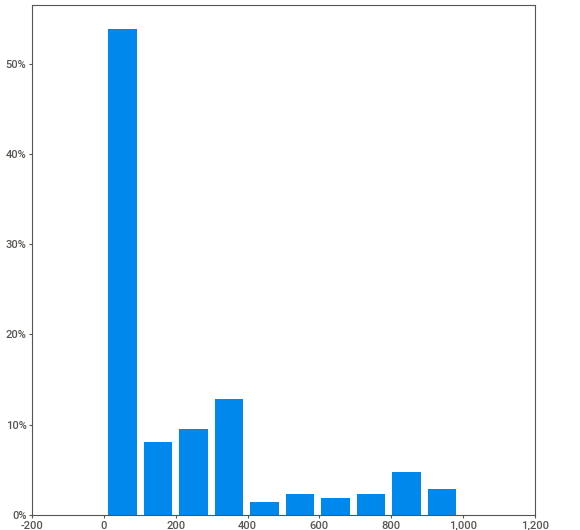
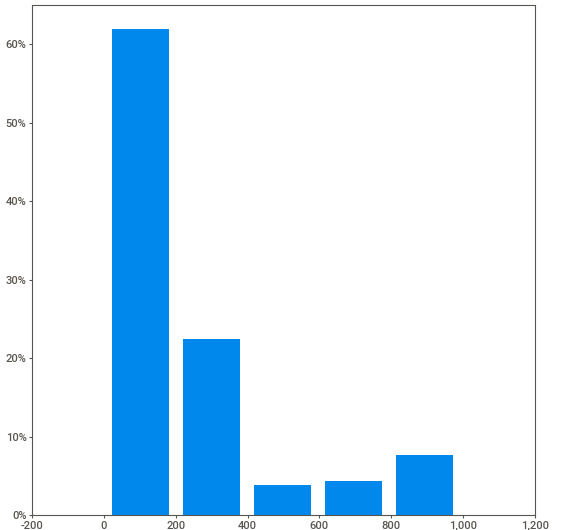
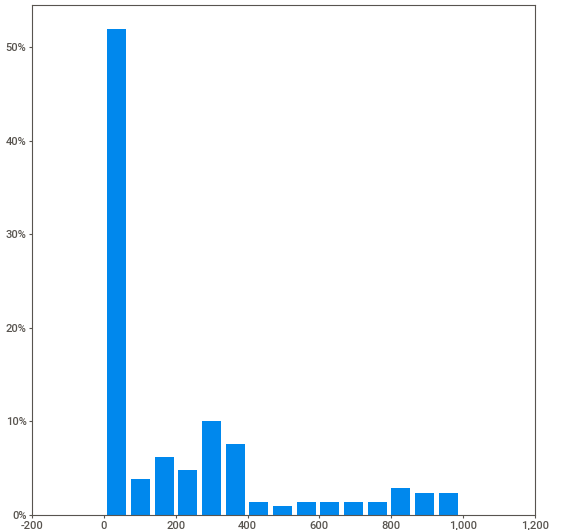
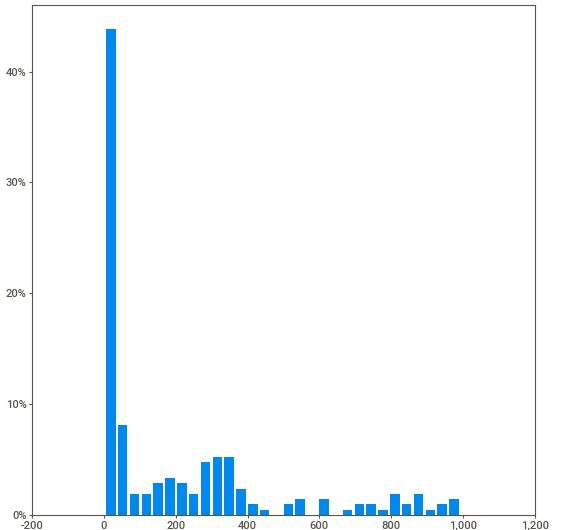
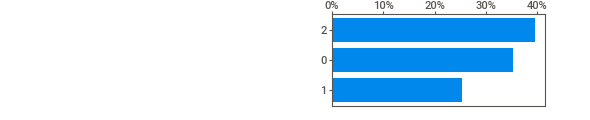
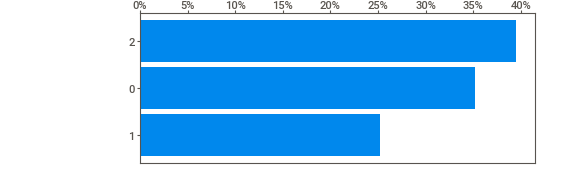
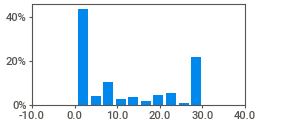
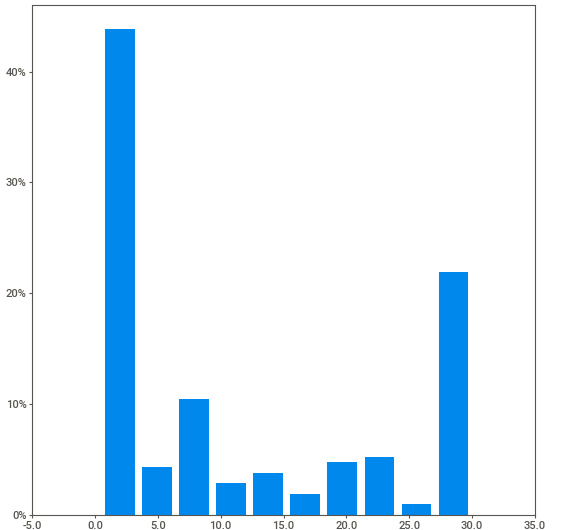
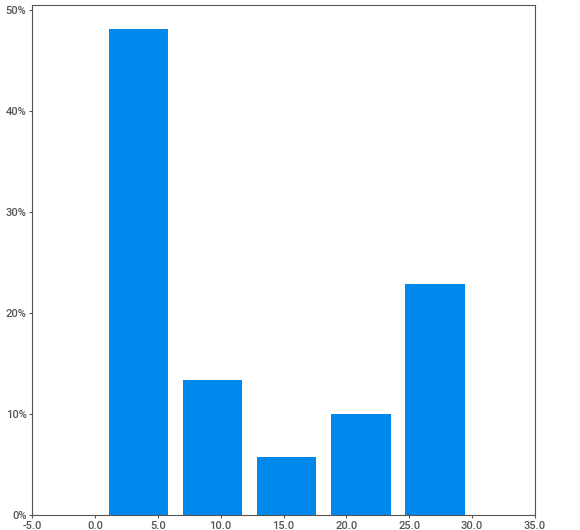
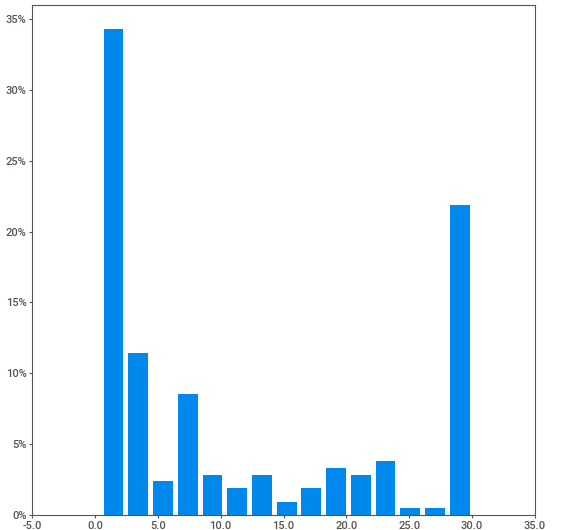
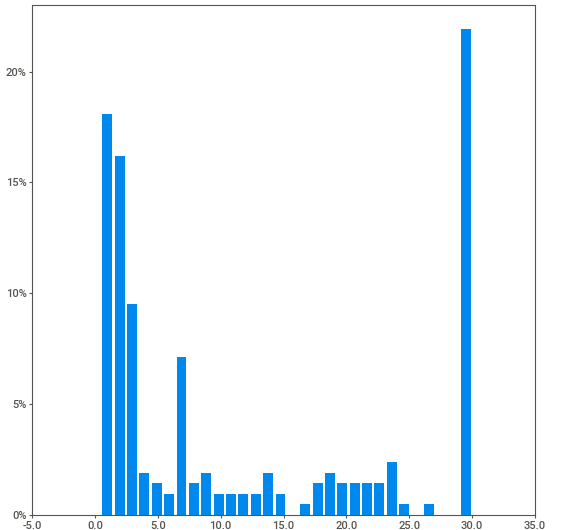
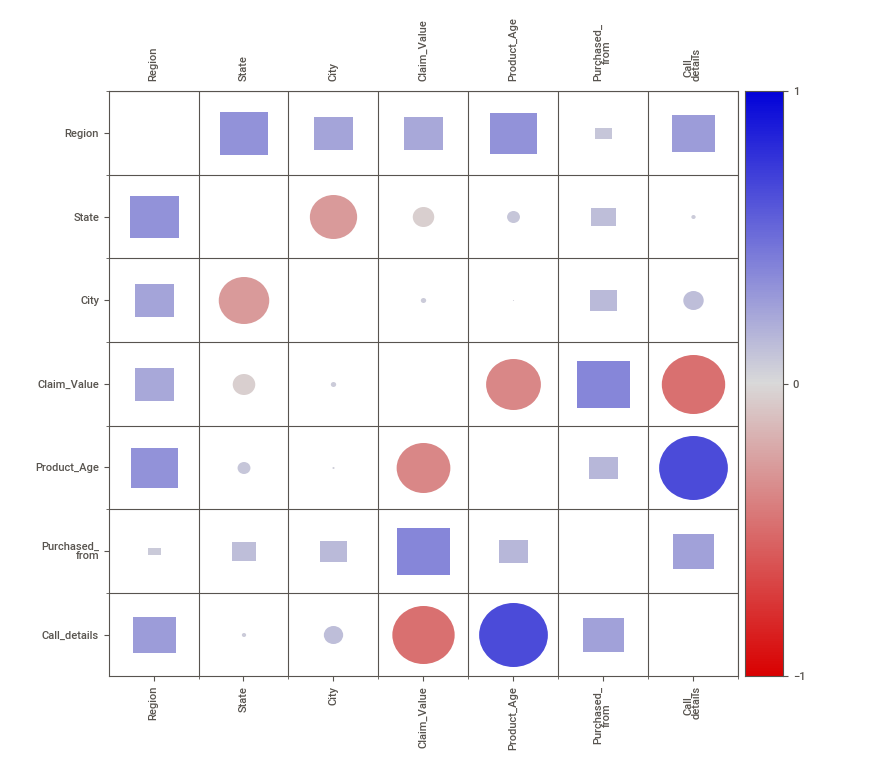
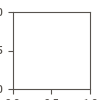

In [182]:
data_report = sv.analyze(data[plot_features])
data_report.show_notebook()

<Axes: >

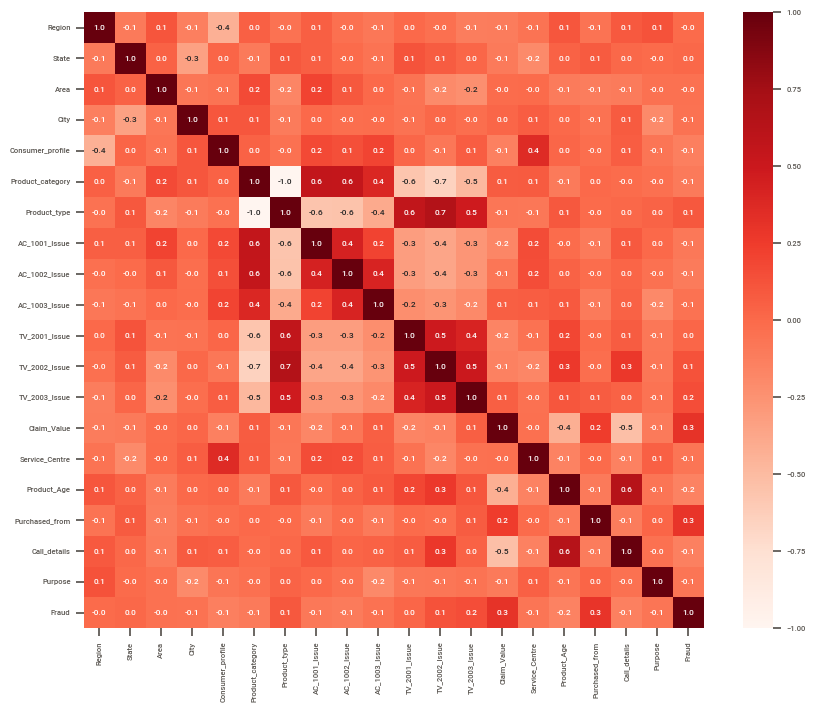

In [183]:
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale=0.5)
sns.heatmap(data.corr(),annot=True,fmt=".1f",cmap="Reds")

Text(0.5, 1.0, 'Region')

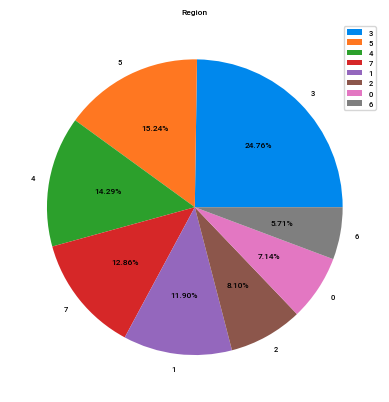

In [184]:
plt.pie(x = data['Region'].value_counts(), labels = data['Region'].unique(), autopct = '%1.2f%%')
plt.legend()
plt.title('Region')

<Axes: xlabel='City', ylabel='count'>

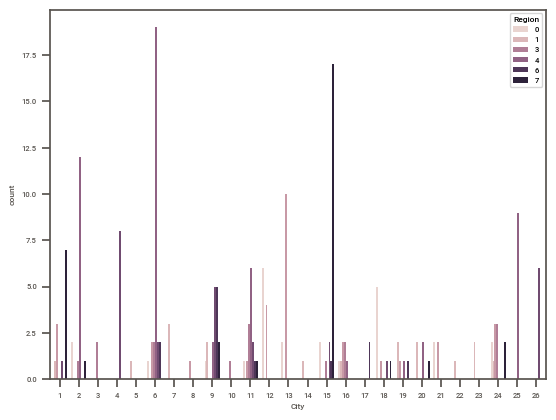

In [185]:
sns.countplot(x = 'City', data = data, hue = 'Region')

## Data Preprocessing 2

<Axes: >

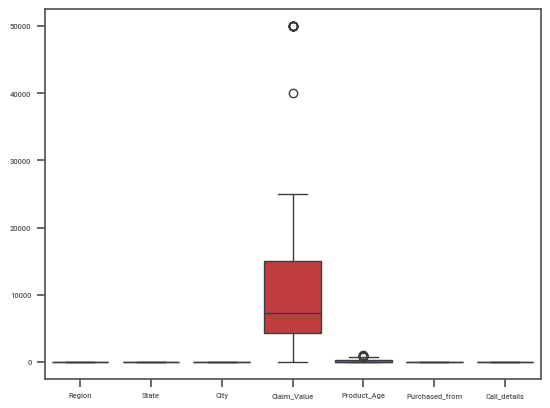

In [186]:
sns.boxplot(data[importance_cols])

In [101]:
# Outliners removing
q1 = data['Claim_Value'].quantile(0.25)
q3 = data['Claim_Value'].quantile(0.75)

IQR = q3 - q1

th_1 = q1 - (1.5 * IQR)
th_2 = q3 + (1.5 * IQR)

<Axes: >

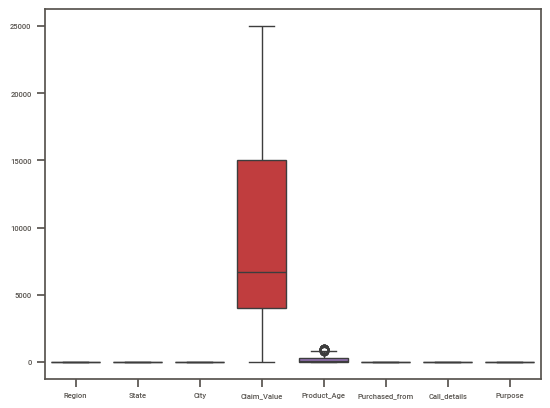

In [102]:
data = data[~((data['Claim_Value'] < (th_1)) |(data['Claim_Value'] > (th_2)))]
sns.boxplot(data[importance_cols])

In [103]:
data.shape

(193, 20)

In [198]:
Fraud = data.iloc[:,-1]
data.drop('Fraud',axis=1,inplace=True)

In [199]:
ss = StandardScaler()

In [200]:
scaled_data = ss.fit_transform(data)

In [201]:
scaled_data = pd.DataFrame(scaled_data,columns=data.columns)

In [203]:
scaled_data = scaled_data.join(Fraud)

## Model Building and evaluation

In [220]:
X = scaled_data.iloc[:,:-1]
Y = scaled_data.iloc[:,-1]

X_train ,X_test ,y_train ,y_test = train_test_split(X,Y,test_size=0.1)

### ANN Model



In [206]:
ann_model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_dim=(19)),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [207]:
ann_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [208]:
history = ann_model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


6/6 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 0.8353 - val_loss: 0.0000e+00 - val_accuracy: 0.7368
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8529 - val_loss: 0.0000e+00 - val_accuracy: 0.7368
Epoch 3/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


6/6 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.8471 - val_loss: 0.0000e+00 - val_accuracy: 0.7368
Epoch 4/20
6/6 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.8471 - val_loss: 0.0000e+00 - val_accuracy: 0.7368
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8471 - val_loss: 0.0000e+00 - val_accuracy: 0.7368
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.8471 - val_loss: 0.0000e+00 - val_accuracy: 0.7368
Epoch 7/20
6/6 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.8471 - val_loss: 0.0000e+00 - val_accuracy: 0.7368
Epoch 8/20
6/6 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.8471 - val_loss: 0.0000e+00 - val_accuracy: 0.7368
Epoch 9/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8471 - val_loss: 0.0000e+00 - val_ac

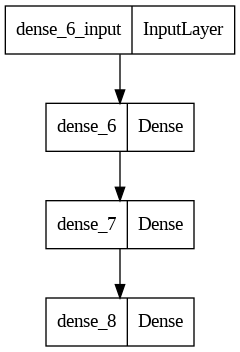

In [209]:
plot_model(ann_model)

In [210]:
ann_model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.8095


[0.0, 0.8095238208770752]

In [211]:
def show_model(history):
  fig , ax = plt.subplots(figsize=(12,5))
  ax.plot(history.history['loss'],color='r',label='Loss' )
  ax.plot(history.history['accuracy'],color='g',label='Accuracy')
  ax.plot(history.history['val_loss'],color='b', label='Val_loss' )
  ax.plot(history.history['val_accuracy'],color='y',label='Val_accuracy')
  plt.legend()

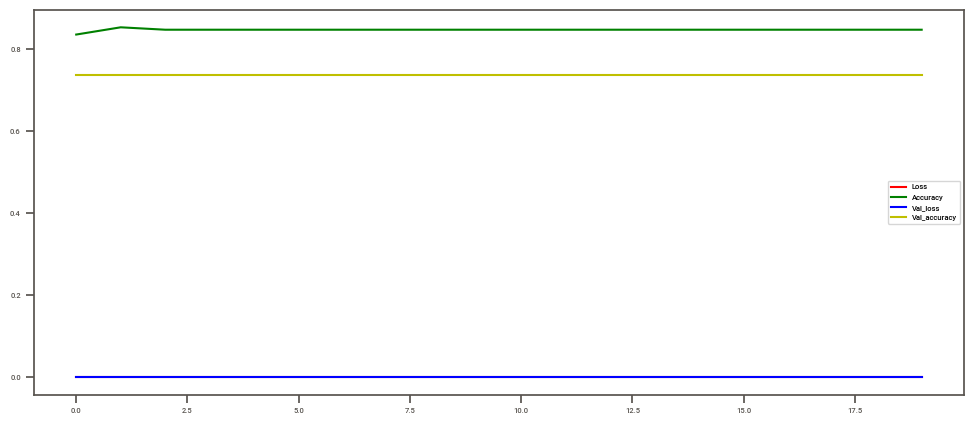

In [212]:
show_model(history=history)

### Logistic Regression Model

In [214]:
Logistic_model = LogisticRegression()

In [215]:
Logistic_model.fit(X_train,y_train)

LogisticRegression()

In [216]:
logistic_pred = Logistic_model.predict(X_test)

In [217]:
Logistic_model.score(X_train,y_train)

0.8624338624338624

In [218]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.00      0.00      0.00         4

    accuracy                           0.76        21
   macro avg       0.40      0.47      0.43        21
weighted avg       0.65      0.76      0.70        21



<ipython-input-219-829f1548963b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logistic_pred, color="y", label="Prediction Value")
<ipython-input-219-829f1548963b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,  color="g", label="Actual Value")


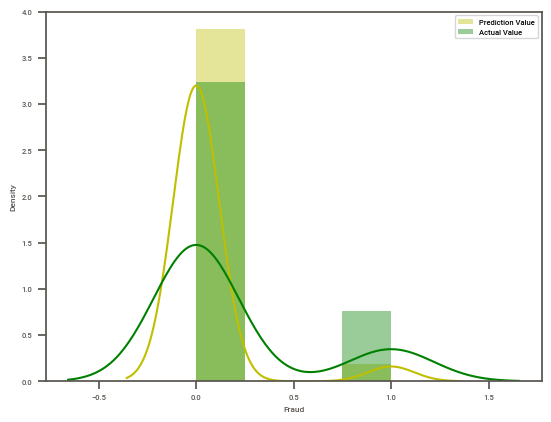

In [219]:
sns.distplot(logistic_pred, color="y", label="Prediction Value")
sns.distplot(y_test,  color="g", label="Actual Value")
plt.legend()

### DecisionTree Model

In [221]:
decision_model = DecisionTreeClassifier()

In [222]:
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

In [223]:
grid = GridSearchCV(decision_model, param_grid, cv=3, verbose=1,scoring='accuracy')

In [224]:
%%time
grid.fit(X_train,y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
CPU times: user 7.44 s, sys: 25.9 ms, total: 7.47 s
Wall time: 7.46 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=1)

In [225]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 0}


In [226]:
detree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=8, min_samples_split=2, random_state=0)

In [227]:
detree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=0)

In [228]:
print(detree_model.score(X_train,y_train))

0.8835978835978836


In [229]:
decision_pred = detree_model.predict(X_test)

In [230]:
print(classification_report(y_test,decision_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.75      0.86         4

    accuracy                           0.95        21
   macro avg       0.97      0.88      0.91        21
weighted avg       0.96      0.95      0.95        21



<ipython-input-231-31ff9d288b1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,hist=False,label='True value',color='blue')
<ipython-input-231-31ff9d288b1a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(decision_pred,hist=False,label='Prediction value',color='red')


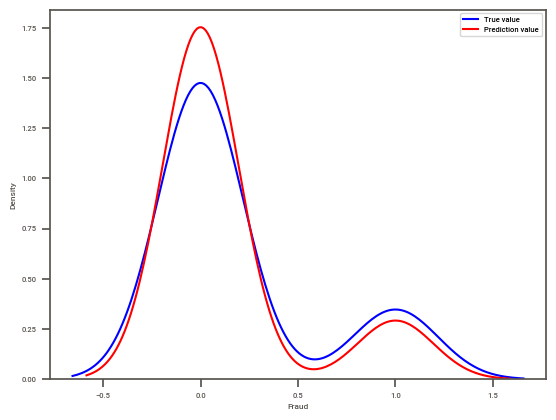

In [231]:
sns.distplot(y_test,hist=False,label='True value',color='blue')
sns.distplot(decision_pred,hist=False,label='Prediction value',color='red')
plt.legend()

## this project was an unbalanced data that was balanced with appropriate techniques, and the decision tree model had higher accuracy, and the ANN did not have good accuracy because it was a small dataset.